In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt

In [3]:
data = data.DataReader(["GOOGL","AAPL", "AMZN","NKE"],"yahoo", start = "2018/01/01",end ="2019/12/31") #importing data
data.head()

Attributes    Adj Close                                           Close  \
Symbols           GOOGL       AAPL         AMZN        NKE        GOOGL   
Date                                                                      
2018-01-02  1073.209961  41.380238  1189.010010  61.411564  1073.209961   
2018-01-03  1091.520020  41.373032  1204.199951  61.401890  1091.520020   
2018-01-04  1095.760010  41.565216  1209.589966  61.363197  1095.760010   
2018-01-05  1110.290039  42.038452  1229.140015  61.885525  1110.290039   
2018-01-08  1114.209961  41.882305  1246.869995  62.436867  1114.209961   

Attributes                                            High             ...  \
Symbols          AAPL         AMZN        NKE        GOOGL       AAPL  ...   
Date                                                                   ...   
2018-01-02  43.064999  1189.010010  63.490002  1075.979980  43.075001  ...   
2018-01-03  43.057499  1204.199951  63.480000  1096.099976  43.637501  ...   
2018-01-04  43.257500  1209.589966  63.439999  1104.079956  43.367500  ...   
2018-01-05  43.750000  1229.140015  63.980000  1113.579956  43.842499  ...   
2018-01-08  43.587502  1246.869995  64.550003  1119.160034  43.902500  ...   

Attributes          Low                    Open                          \
Symbols            AMZN        NKE        GOOGL       AAPL         AMZN   
Date                                                                      
2018-01-02  1170.510010  62.849998  1053.020020  42.540001  1172.000000   
2018-01-03  1188.300049  62.759998  1073.930054  43.132500  1188.300049   
2018-01-04  1204.660034  62.549999  1097.089966  43.134998  1205.000000   
2018-01-05  1210.000000  63.470001  1103.449951  43.360001  1217.510010   
2018-01-08  1232.030029  63.980000  1111.000000  43.587502  1236.000000   

Attributes                Volume                                      
Symbols           NKE      GOOGL         AAPL       AMZN         NKE  
Date                                                                  
2018-01-02  62.849998  1588300.0  102223600.0  2694500.0   6511000.0  
2018-01-03  63.480000  1565900.0  118071600.0  3108800.0   6091100.0  
2018-01-04  63.400002  1302600.0   89738400.0  3022100.0   5780500.0  
2018-01-05  63.700001  1512500.0   94640000.0  3544700.0  11632300.0  
2018-01-08  64.150002  1232200.0   82271200.0  4279500.0  11905700.0  

[5 rows x 24 columns]

In [4]:
data1 = data['Adj Close']##the columns I need for my analysis
data1.head()

Symbols,GOOGL,AAPL,AMZN,NKE
Date,,,,
2018-01-02,1073.209961,41.380238,1189.010010,61.411564
2018-01-03,1091.520020,41.373032,1204.199951,61.401890
2018-01-04,1095.760010,41.565216,1209.589966,61.363197
2018-01-05,1110.290039,42.038452,1229.140015,61.885525
2018-01-08,1114.209961,41.882305,1246.869995,62.436867


# Portfolio expected return

In [5]:
R_bar = data1.resample('Y').last().pct_change().mean() ##Mean return
R_bar

Symbols
GOOGL    0.281762
AAPL     0.889578
AMZN     0.230278
NKE      0.380941
dtype: float64

In [6]:
#Portfolio returns
w = [0.1,0.2,0.5,0.2]
port_rt = (w * R_bar).sum()
port_rt


0.39741877487089966

# Efficient Frontier

In [7]:
p_ret =[] # empty array for portifolio
p_vol = [] # empty array for portfolio volatility
p_weights = [] # empty array for assets weights

num_assets = len(data1.columns)
num_portfolios = 10000

In [8]:
data2 = data1.pct_change().apply(lambda x: np.log(1+x)) #log percentage of change
cov_matrix = data2.cov() # covariance 
cov_matrix

Symbols,GOOGL,AAPL,AMZN,NKE
Symbols,,,,
GOOGL,0.000269,0.000178,0.000216,0.000119
AAPL,0.000178,0.000303,0.000206,0.000122
AMZN,0.000216,0.000206,0.000363,0.000139
NKE,0.000119,0.000122,0.000139,0.000253


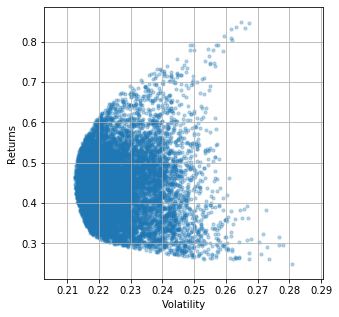

In [9]:
# calculate the returns and risk (Volatility)
for portfolio in range (num_portfolios):
    
    #a.get the random numbers for weights
    weights =np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    
    R_bar = data1.resample('Y').last().pct_change().mean()
    #R_bar
    returns = np.dot(weights,R_bar)
    p_ret.append(returns)
    
    var = cov_matrix.mul(weights, axis =0).mul(weights, axis=1).sum().sum() # portfolio variance
    sd = np.sqrt(var) # daily standard deviation
    ann_sd = sd*np.sqrt(250) #annual standard deviation = volatility
    p_vol.append(ann_sd)
data = {'Returns': p_ret,'Volatility':p_vol}

for counter, symbol in enumerate(data1.columns.tolist()):
    data[symbol+ 'weight'] = [w[counter] for w in p_weights]

    
portfolios = pd.DataFrame(data)
portfolios.head() 

# 4 plotting  the efficient frontier graph
portfolios.plot.scatter(x='Volatility',y ='Returns', marker ='o',s =10, alpha =0.3,grid = True, figsize=[5,5])

In [10]:
sd

0.014969532163264042